In [2]:
import os
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path
from shutil import copyfile

In [3]:
def split_dataset(source, training, testing, validation, split_size):

  file_names = os.listdir(source) 
  file_number = len(file_names) 

  for index, file in enumerate(file_names): 
      if index < split_size * file_number: 
        if index < 0.8 * file_number:
          copyfile(os.path.join(source, file), os.path.join(training, file))
        else:
          copyfile(os.path.join(source, file), os.path.join(validation, file))
      else: 
          copyfile(os.path.join(source, file), os.path.join(testing, file))

In [5]:
new_train_dir = r'D:\ML_BRAIT\dataset\train'
new_test_dir = r'D:\ML_BRAIT\dataset\test'
new_val_dir = r'D:\ML_BRAIT\dataset\validation'

os.mkdir(new_train_dir)
os.mkdir(new_test_dir)
os.mkdir(new_val_dir)

In [6]:
source_dataset = r'D:\ML_BRAIT\BrailleDataset'
dataset_list = os.listdir(source_dataset)

for data in dataset_list:
  print(data, " : ", str(len(os.listdir(os.path.join(source_dataset, data)))))
  os.mkdir(os.path.join(new_train_dir, data))
  os.mkdir(os.path.join(new_test_dir, data))
  os.mkdir(os.path.join(new_val_dir, data))

a  :  609
b  :  609
c  :  780
colon  :  59
d  :  749
e  :  707
f  :  627
g  :  642
h  :  614
i  :  614
j  :  619
k  :  617
koma  :  51
l  :  628
m  :  621
n  :  651
o  :  622
p  :  622
petik_satu  :  57
q  :  635
r  :  668
s  :  615
semicolon  :  58
space  :  15
t  :  555
tanda_hubung  :  54
tanda_seru  :  50
tanda_tanya  :  55
titik  :  54
u  :  514
v  :  535
w  :  530
x  :  535
y  :  540
z  :  536


In [7]:
split_size = .9

for dt in dataset_list:
  split_dataset(os.path.join(source_dataset, dt), os.path.join(new_train_dir, dt), os.path.join(new_test_dir, dt), os.path.join(new_val_dir, dt), split_size)

In [8]:
path_train = r'D:\ML_BRAIT\dataset\train'
path_test = r'D:\ML_BRAIT\dataset\test'
path_val = r'D:\ML_BRAIT\dataset\validation'

jmh_braille_train = os.listdir(path_train)
jmh_braille_test = os.listdir(path_test)
jmh_braille_val = os.listdir(path_val)

total_images = 0

for braille in jmh_braille_train:
  print(braille, " \t\t\t: ", len(os.listdir(os.path.join(path_train, braille)))+len(os.listdir(os.path.join(path_test, braille)))+len(os.listdir(os.path.join(path_val, braille))), " images")
  total_images += int(len(os.listdir(os.path.join(path_train, braille))))

print("Training Images : " + str(total_images))

a  			:  609  images
b  			:  609  images
c  			:  780  images
colon  			:  59  images
d  			:  749  images
e  			:  707  images
f  			:  627  images
g  			:  642  images
h  			:  614  images
i  			:  614  images
j  			:  619  images
k  			:  617  images
koma  			:  51  images
l  			:  628  images
m  			:  621  images
n  			:  651  images
o  			:  622  images
p  			:  622  images
petik_satu  			:  57  images
q  			:  635  images
r  			:  668  images
s  			:  615  images
semicolon  			:  58  images
space  			:  15  images
t  			:  555  images
tanda_hubung  			:  54  images
tanda_seru  			:  50  images
tanda_tanya  			:  55  images
titik  			:  54  images
u  			:  514  images
v  			:  535  images
w  			:  530  images
x  			:  535  images
y  			:  540  images
z  			:  536  images
Training Images : 13171


In [10]:
from keras_preprocessing.image import ImageDataGenerator

TARGET_SIZE = (150,100)
BATCH_SIZE = 64

TRAINING_DIR = r'D:\ML_BRAIT\dataset\train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      validation_split = 0.2,
      fill_mode='nearest')

TESTING_DIR = r'D:\ML_BRAIT\dataset\test'
testing_datagen = ImageDataGenerator(rescale=1./255)

VALIDATION_DIR = r'D:\ML_BRAIT\dataset\validation'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=TARGET_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE,
  shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=TARGET_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE,
  shuffle=True
)

test_generator = testing_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 13171 images belonging to 35 classes.
Found 1648 images belonging to 35 classes.
Found 1628 images belonging to 35 classes.


In [13]:
#cek label
image_dir = Path(r'D:\ML_BRAIT\dataset\train')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [14]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(10)

,Filepath,Label
0,D:\ML_BRAIT\dataset\train\s\s1_c13096_result_1...,s
1,D:\ML_BRAIT\dataset\train\u\1_result_1.jpg,u
2,D:\ML_BRAIT\dataset\train\j\j_136_result_resul...,j
3,D:\ML_BRAIT\dataset\train\d\14_result_result.jpg,d
4,D:\ML_BRAIT\dataset\train\w\13_result.jpg,w
5,D:\ML_BRAIT\dataset\train\o\o_156_result.jpg,o
6,D:\ML_BRAIT\dataset\train\n\n_30_result.jpg,n
7,D:\ML_BRAIT\dataset\train\s\1529019302521_s_1_...,s
8,D:\ML_BRAIT\dataset\train\l\l_117_result_resul...,l
9,D:\ML_BRAIT\dataset\train\n\n1.JPG4dim.jpg,n


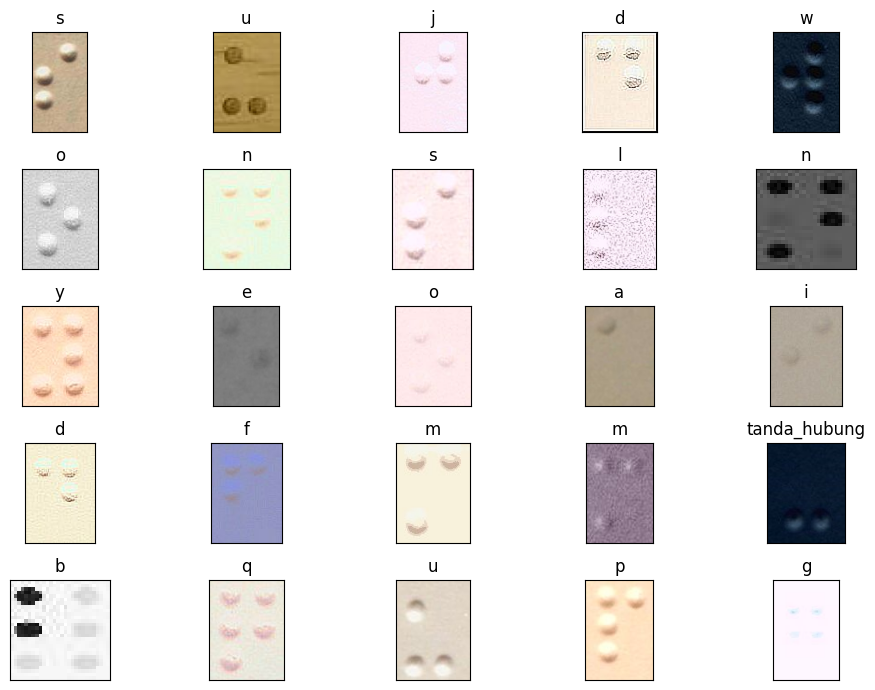

In [15]:
# Display some pictures of the dataset with their labels

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()